
# Submission 2 - Movie Recommendation System - Pangeran Silaen MC114D5Y1975

    - **Dataset:** [Movies & Ratings for Recommendation System](https://www.kaggle.com/datasets/nicoletacilibiu/movies-and-ratings-for-recommendation-system?select=ratings.csv)
    - **Tujuan:** Notebook ini bertujuan untuk membangun sistem rekomendasi film menggunakan dua pendekatan utama: Content-Based Filtering dan Collaborative Filtering (dengan algoritma K-Means Clustering dan Deep Learning).

## 1. Data Understanding

Tahap awal untuk memahami data yang akan digunakan.

### 1.1 Import Library
Mengimpor pustaka-pustaka Python yang dibutuhkan untuk analisis data, visualisasi, dan machine learning:
- `pandas` & `numpy`: Manipulasi data.
- `seaborn` & `matplotlib`: Visualisasi data.
- `random`: Untuk pemilihan acak.
- `warnings`: Mengabaikan pesan peringatan.

In [1]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


### 1.2 Data Loading
Memuat dua dataset utama dari file CSV:
- `movies.csv`: Berisi informasi tentang film (ID, judul, genre).
- `ratings.csv`: Berisi informasi rating yang diberikan pengguna ke film (ID pengguna, ID film, rating, timestamp).

In [2]:
# Load datasets
movies = pd.read_csv('assets\movie\movies.csv')
ratings = pd.read_csv('assets\movie\\ratings.csv')

### 1.3 Exploratory Data Analysis (EDA)
Melakukan eksplorasi awal pada kedua dataset untuk memahami karakteristiknya.

#### 1.3.1 movies.csv

- **Menampilkan Dataset:** Menampilkan beberapa baris pertama dan informasi umum dataset `movies`.

In [3]:
# Tampilkan dataset movies
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


- **Menghitung Jumlah Film:** Menghitung dan menampilkan jumlah unik film dalam dataset.

In [4]:
print("Jumlah film:",len(movies['movieId'].unique()))

Jumlah film: 9742


- **Visualisasi Jumlah Film per Genre:** Membuat visualisasi (bar plot) untuk melihat distribusi jumlah film berdasarkan genre. Genre diekstrak dari kolom `genres`.

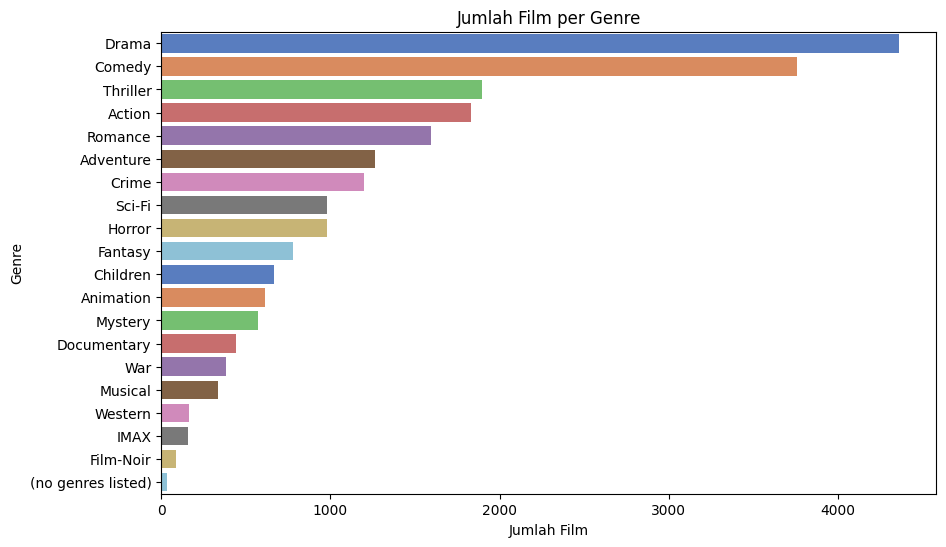

In [5]:
# Visualisasi Jumlah Film per Genre
genre_count = movies['genres'].str.split('|', expand=True).stack().value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=genre_count.values, y=genre_count.index, palette='muted')
plt.title('Jumlah Film per Genre')
plt.xlabel('Jumlah Film')
plt.ylabel('Genre')
plt.show()

#### 1.3.2 ratings.csv

- **Menampilkan Dataset:** Menampilkan beberapa baris pertama dan informasi umum dataset `ratings`.

In [6]:
# Tampilkan dataset ratings
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


- **Menghitung Jumlah User dan Film:** Menghitung dan menampilkan jumlah unik pengguna dan film yang ada dalam data rating.

In [7]:
# Menghitung Jumlah user dan film
print("Jumlah user:",len(ratings['userId'].unique()),"\nJumlah film:",len(ratings['movieId'].unique()))

Jumlah user: 610 
Jumlah film: 9724


- **Statistik Deskriptif:** Menampilkan ringkasan statistik (seperti rata-rata, standar deviasi, min, max) untuk kolom numerik, terutama kolom `rating`.


In [8]:
# Statistik Deskriptif ratings
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


- **Visualisasi Rating Film:** Membuat visualisasi (count plot) untuk melihat distribusi pemberian rating oleh pengguna.


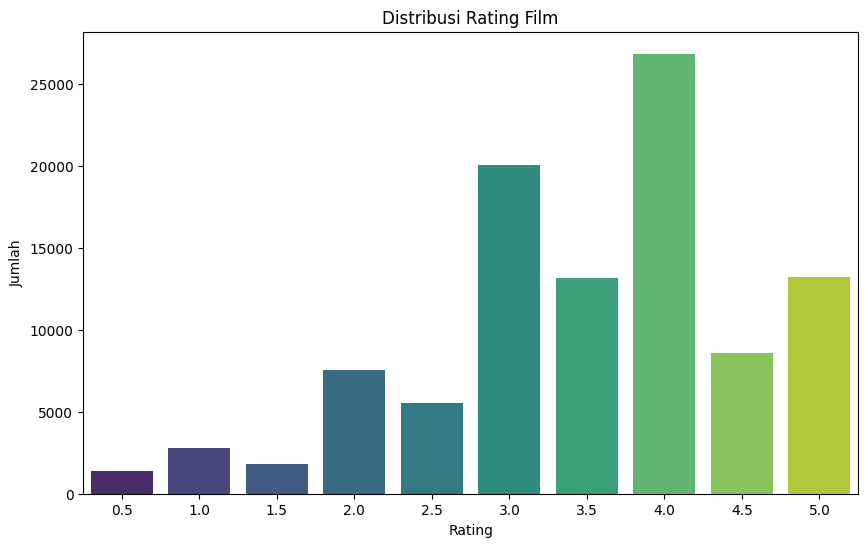

In [9]:
# Visualisasi Distribusi Rating
plt.figure(figsize=(10,6))
sns.countplot(x='rating', data=ratings, palette='viridis')
plt.title('Distribusi Rating Film')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.show()

- **Analisis Jumlah Rating per Tahun:** Mengubah kolom `timestamp` menjadi format tahun dan membuat visualisasi (count plot) untuk melihat tren jumlah rating yang diberikan setiap tahun.



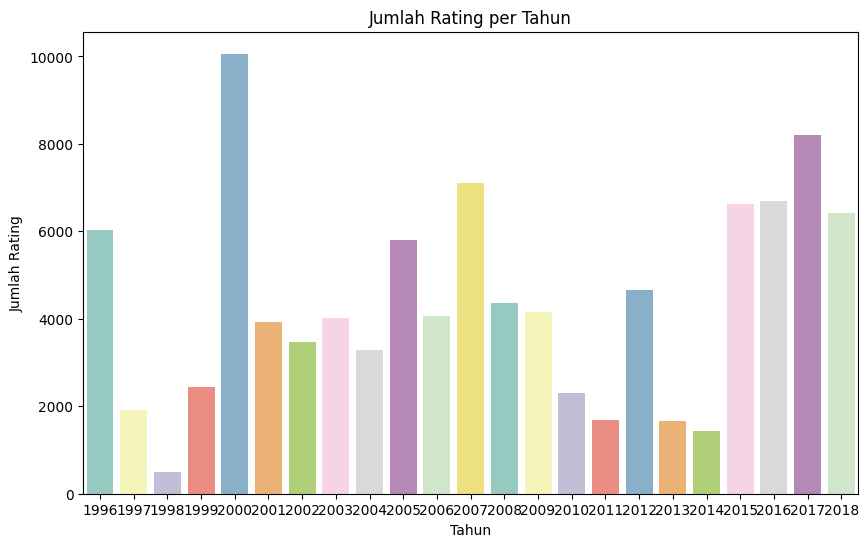

In [10]:
# Analisis Waktu
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings['year'] = ratings['timestamp'].dt.year

plt.figure(figsize=(10,6))
sns.countplot(x='year', data=ratings, palette='Set3')
plt.title('Jumlah Rating per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Rating')
plt.show()

---

## 2. Content-Based Filtering

Metode rekomendasi berdasarkan kesamaan fitur antar item (dalam hal ini, genre film).

### 2.1 Data Preparation
Mempersiapkan data film untuk Content-Based Filtering.

- **Menyalin Dataset:** Membuat salinan dari dataset `movies` agar tidak mengubah data asli.

In [11]:
# Mengcopy dataset movie
movies_df = movies.copy()

- **Membuat Kolom Genre (One-Hot Encoding):** Mengubah kolom `genres` yang berisi string genre (dipisahkan oleh `|`) menjadi beberapa kolom biner (0 atau 1) untuk setiap genre unik. Ini adalah bentuk *one-hot encoding* manual.

In [12]:
# Membuat kolom baru untuk setiap genre
genres = set()
for genre_string in movies_df['genres']:
    genres.update(genre_string.split('|'))

# Inisialisasi kolom dengan nilai 0
for genre in genres:
    movies_df[genre] = 0

# Mengisi nilai kolom baru
for index, row in movies_df.iterrows():
    for genre in row['genres'].split('|'):
        movies_df.at[index, genre] = 1

- **Menghapus Baris Tanpa Genre:** Menghapus film yang tidak memiliki informasi genre (`(no genres listed)`).

In [13]:
# Menghapus baris yang tidak memiliki genre
movies_df = movies_df[movies_df['genres'] != '(no genres listed)']

- **Menampilkan Data Olahan:** Menampilkan dataframe `movies_df` setelah proses persiapan.


In [14]:
# Menampilkan dataset
movies_df

,movieId,title,genres,Comedy,Drama,Western,War,Musical,(no genres listed),Horror,...,Action,Crime,Adventure,Film-Noir,Documentary,Mystery,Sci-Fi,Thriller,Romance,IMAX
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,Father of the Bride Part II (1995),Comedy,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9739,193585,Flint (2017),Drama,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


- **Menghapus Kolom Tidak Perlu:** Menghapus kolom `(no genres listed)` yang sudah tidak relevan.


In [15]:
movies_df.drop('(no genres listed)', axis=1, inplace=True)

- **Menampilkan Kolom:** Menampilkan daftar kolom akhir pada dataframe `movies_df`.

In [16]:
movies_df.columns

Index(['movieId', 'title', 'genres', 'Comedy', 'Drama', 'Western', 'War',
       'Musical', 'Horror', 'Fantasy', 'Children', 'Animation', 'Action',
       'Crime', 'Adventure', 'Film-Noir', 'Documentary', 'Mystery', 'Sci-Fi',
       'Thriller', 'Romance', 'IMAX'],
      dtype='object')

### 2.2 Model Development
Membangun model Content-Based Filtering.


- **Menghitung Cosine Similarity:** Menggunakan `cosine_similarity` dari `sklearn` untuk menghitung matriks kesamaan antar film berdasarkan fitur genre (kolom-kolom genre yang sudah di-encode). Skor kesamaan berkisar antara 0 dan 1.


In [17]:
from sklearn.metrics.pairwise import cosine_similarity
# Hitung similarity score
similarity_matrix = cosine_similarity(movies_df.iloc[:, 3:])  # Menghitung similarity score dari kolom genre

- **Membuat Fungsi Rekomendasi:** Mendefinisikan fungsi `get_recommendations` yang menerima judul film, matriks kesamaan, dan dataframe film. Fungsi ini:
    1. Menemukan indeks film berdasarkan judul.
    2. Mendapatkan skor kesamaan film tersebut dengan semua film lain.
    3. Mengurutkan film berdasarkan skor kesamaan tertinggi.
    4. Mengambil N film teratas (tidak termasuk film itu sendiri).
    5. Mengembalikan dataframe berisi judul, genre, ID, dan skor kesamaan film yang direkomendasikan.


In [18]:
def get_recommendations(movie_title, similarity_matrix=similarity_matrix, movies_df=movies_df, top_n=10):
    idx = movies_df.index[movies_df['title'] == movie_title].tolist()[0] # Dapatkan indeks film berdasarkan judul
    similarity_scores = list(enumerate(similarity_matrix[idx])) # Dapatkan similarity scores dari film dengan film lainnya
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True) # Urutkan similarity scores dari yang tertinggi
    top_similar_movies = similarity_scores[1:top_n+1] # Ambil top N film yang paling mirip
    recommended_movies = [(movies_df.iloc[movie[0]]['title'], movies_df.iloc[movie[0]]['genres'], movies_df.iloc[movie[0]]['movieId'], movie[1]) for movie in top_similar_movies] # Dapatkan judul, genres, dan movieId dari film-film yang direkomendasikan

    recommended_df = pd.DataFrame(recommended_movies, columns=['title','genres','movieId','Similarity Score'])  # Buat DataFrame dari hasil rekomendasi
    return recommended_df.head(top_n)  # Mengembalikan DataFrame dengan top N film yang direkomendasikan

- **Simulasi Penggunaan:**
    1. Memilih satu judul film secara acak.
    2. Memanggil fungsi `get_recommendations` untuk mendapatkan 10 rekomendasi teratas.
    3. Menampilkan detail film acak tersebut dan hasil rekomendasinya.


In [19]:
# Memilih judul film secara acak dari dataset
random_movie_title = random.choice(movies_df['title'])
random_movie_genre = movies_df.loc[movies_df['title'] == random_movie_title, 'genres'].values[0]
random_movieId = movies_df.loc[movies_df['title'] == random_movie_title, 'movieId'].values[0]
genre_list = random_movie_genre.split('|')

# Mendapatkan rekomendasi untuk film tersebut
recommendations = get_recommendations(random_movie_title, similarity_matrix, movies_df)

# Menampilkan judul, genre, dan presisi dari film yang direkomendasikan
print(f"Judul: {random_movie_title}")
print(f"MovieId: {random_movieId}")
print(f"Genre: {random_movie_genre}")
print("======="*7)
print("TOP 10 REKOMENDASI FILM :")
recommendations

Judul: Iceman, The (2012)
MovieId: 99750
Genre: Crime|Drama|Thriller
TOP 10 REKOMENDASI FILM :


,title,genres,movieId,Similarity Score
0,Amateur (1994),Crime|Drama|Thriller,149,1.0
1,Kiss of Death (1995),Crime|Drama|Thriller,259,1.0
2,Fresh (1994),Crime|Drama|Thriller,456,1.0
3,Killing Zoe (1994),Crime|Drama|Thriller,482,1.0
4,"Perfect World, A (1993)",Crime|Drama|Thriller,507,1.0
5,Mulholland Falls (1996),Crime|Drama|Thriller,707,1.0
6,Cape Fear (1962),Crime|Drama|Thriller,1344,1.0
7,Blood and Wine (Blood & Wine) (1996),Crime|Drama|Thriller,1351,1.0
8,Desperate Measures (1998),Crime|Drama|Thriller,1598,1.0
9,Playing God (1997),Crime|Drama|Thriller,1647,1.0


- **Membuat Fungsi Evaluasi:**
    1. `similarity_score_precision`: Menghitung rata-rata skor kesamaan dari film yang direkomendasikan (metrik custom).
    2. `precision_sklearn`: Mencoba menghitung presisi berdasarkan kesamaan genre antara film input dan film rekomendasi (implementasi custom, bukan metrik presisi standar).


In [20]:
def similarity_score_precision(recommendations):
    result=0
    for score in recommendations:
        result+=score
    return result/len(recommendations)

In [21]:
from sklearn.metrics import precision_score
def precision_sklearn(recommendations):
    count =0
    result = 0
    for genre in recommendations:
        genre_per_row = genre.split('|')
        if len(genre_per_row) == len(genre_list):
            result += precision_score(genre_per_row, genre_list, average="micro")
            count += 1
    return result/count

- **Mengevaluasi Model:** Menghitung dan menampilkan nilai presisi berdasarkan kedua fungsi evaluasi custom di atas.


In [22]:
precision_sim = similarity_score_precision(recommendations['Similarity Score'].values)
precision_genre = precision_sklearn(recommendations['genres'].values)
print("Presisi berdasarkan similarity score: ",precision_sim)
print("Presisi berdasarkan genre: ",precision_genre)

Presisi berdasarkan similarity score:  1.0000000000000002
Presisi berdasarkan genre:  1.0


- **Visualisasi Metrik:** Membuat visualisasi (bar plot) untuk membandingkan kedua nilai presisi yang dihitung.

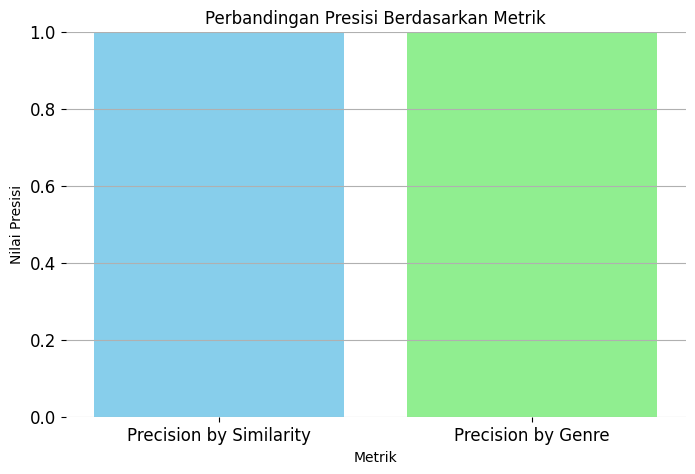

In [23]:
# Metrik dan nilai untuk visualisasi
metrics = ['Precision by Similarity', 'Precision by Genre']
values = [precision_sim, precision_genre]

# Buat plot
plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, values, color=['skyblue', 'lightgreen'])

plt.xlabel('Metrik')
plt.ylabel('Nilai Presisi')
plt.title('Perbandingan Presisi Berdasarkan Metrik')
plt.ylim(0, 1)  # Sumbu y dari 0 hingga 1
plt.grid(axis='y')  # Garis grid pada sumbu y

# Menambahkan animasi pada plot
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

---

## 3. Collaborative Filtering

Metode rekomendasi berdasarkan pola rating dari pengguna lain.

### 3.1 Cluster Based Algorithm (K-Means)

Mengelompokkan pengguna berdasarkan pola rating mereka, lalu merekomendasikan film populer dari cluster yang sama.

#### 3.1.1 Data Preparation

- **Import Library:** Mengimpor pustaka tambahan untuk clustering (`KMeans`, `Pipeline`, `GridSearchCV`, `StandardScaler`) dan evaluasi (`mean_squared_error`).


In [24]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

- **Menggabungkan Dataset:** Menggabungkan data `ratings` dan `movies`.


In [25]:
# Menggabungkan dataset ratings dan movies
data = pd.merge(ratings, movies, on='movieId')

- **Membuat Pivot Table (User-Item Matrix):** Membuat matriks di mana baris adalah `userId`, kolom adalah `movieId`, dan nilainya adalah `rating`.


In [26]:
# Membuat pivot table untuk user-item
user_item_matrix = data.pivot_table(index='userId', columns='movieId', values='rating')

- **Mengisi Nilai Null:** Mengganti nilai `NaN` (film yang belum dirating pengguna) dengan 0.


In [27]:
# Mengisi nilai null dengan 0
user_item_matrix = user_item_matrix.fillna(0)

- **Menampilkan Matrix Rating:** Menampilkan matriks user-item yang telah dibuat.

In [28]:
# Menampilkan user-item matrix
user_item_matrix

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,2.5,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 3.1.2 Model Development


- **Membuat Pipeline:** Mendefinisikan `Pipeline` yang terdiri dari `StandardScaler` (untuk normalisasi data) dan `KMeans` (untuk clustering).


In [29]:
# Menggunakan Pipeline untuk menangani proses standarisasi dan clustering 
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans())
])

- **Parameter Tuning (GridSearch):**
    - Mendefinisikan `param_grid` berisi berbagai kombinasi hyperparameter untuk `KMeans` (jumlah cluster, metode inisialisasi, dll.).
    - Menggunakan `GridSearchCV` untuk mencari kombinasi hyperparameter terbaik dengan validasi silang (cv=5).


In [30]:
# Mengatur parameter untuk grid search
param_grid = {
    'kmeans__n_clusters': list(range(5, 21)),
    'kmeans__init': ['random'], 
    'kmeans__n_init': [5, 10, 15],  
    'kmeans__max_iter': [100, 150, 200], 
    'kmeans__tol': [0.00001, 0.0001, 0.001],  
    'kmeans__random_state': [42]  
}

In [31]:
# Melakukan grid search untuk menemukan parameter terbaik
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=2)
grid_search.fit(user_item_matrix)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[CV] END kmeans__init=random, kmeans__max_iter=100, kmeans__n_clusters=5, kmeans__n_init=5, kmeans__random_state=42, kmeans__tol=1e-05; total time=   0.7s
[CV] END kmeans__init=random, kmeans__max_iter=100, kmeans__n_clusters=5, kmeans__n_init=5, kmeans__random_state=42, kmeans__tol=1e-05; total time=   0.5s
[CV] END kmeans__init=random, kmeans__max_iter=100, kmeans__n_clusters=5, kmeans__n_init=5, kmeans__random_state=42, kmeans__tol=1e-05; total time=   0.6s
[CV] END kmeans__init=random, kmeans__max_iter=100, kmeans__n_clusters=5, kmeans__n_init=5, kmeans__random_state=42, kmeans__tol=1e-05; total time=   0.5s
[CV] END kmeans__init=random, kmeans__max_iter=100, kmeans__n_clusters=5, kmeans__n_init=5, kmeans__random_state=42, kmeans__tol=1e-05; total time=   0.5s
[CV] END kmeans__init=random, kmeans__max_iter=100, kmeans__n_clusters=5, kmeans__n_init=5, kmeans__random_state=42, kmeans__tol=0.0001; total time=   0.5s
[CV] END kmeans__init=random, kmeans__max_iter=100, kmeans__n_cluster

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('kmeans', KMeans())]),
             param_grid={'kmeans__init': ['random'],
                         'kmeans__max_iter': [100, 150, 200],
                         'kmeans__n_clusters': [5, 6, 7, 8, 9, 10, 11, 12, 13,
                                                14, 15, 16, 17, 18, 19, 20],
                         'kmeans__n_init': [5, 10, 15],
                         'kmeans__random_state': [42],
                         'kmeans__tol': [1e-05, 0.0001, 0.001]},
             verbose=2)

- **Mendapatkan Parameter Terbaik:** Menampilkan hyperparameter terbaik yang ditemukan oleh `GridSearchCV`.

In [32]:
# Menampilkan parameter terbaik
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'kmeans__init': 'random', 'kmeans__max_iter': 100, 'kmeans__n_clusters': 18, 'kmeans__n_init': 10, 'kmeans__random_state': 42, 'kmeans__tol': 1e-05}
Best Score: -1388923.7242022362


- **Melakukan Clustering:** Melakukan clustering pada matriks user-item menggunakan `KMeans` dengan parameter terbaik.


In [33]:
# Melakukan clustering dengan parameter terbaik
best_kmeans = KMeans(n_clusters=best_params['kmeans__n_clusters'], init=best_params['kmeans__init'])
clusters = best_kmeans.fit_predict(user_item_matrix)

- **Menambahkan Kolom Cluster:** Menambahkan label cluster hasil `KMeans` ke matriks user-item.


In [34]:
# Menambahkan kolom 'cluster' pada user_item_matrix
user_item_matrix['cluster'] = clusters

- **Membuat Fungsi Rekomendasi:** Mendefinisikan fungsi `recommend_movies_kmeans` yang:
    1. Menemukan cluster pengguna target.
    2. Menghitung rata-rata rating untuk setiap film dalam cluster tersebut.
    3. Mengurutkan film berdasarkan rata-rata rating tertinggi.
    4. Menghapus film yang sudah dirating oleh pengguna target.
    5. Mengembalikan N film teratas beserta informasi judul dan genre.
    6. (Tambahan) Menghitung MSE dan RMSE antara rating asli pengguna dan rata-rata rating cluster sebagai evaluasi internal.


In [35]:
# Membuat fungsi untuk mendapatkan rekomendasi
def recommend_movies_kmeans(user_id, num_recommendations=10):
    user_cluster = user_item_matrix.loc[user_id]['cluster']
    cluster_movies = user_item_matrix[user_item_matrix['cluster'] == user_cluster].drop(columns='cluster')
    user_ratings = user_item_matrix.loc[user_id].drop('cluster')
    recommended_movies = cluster_movies.mean().sort_values(ascending=False)
    already_rated = user_ratings[user_ratings > 0].index
    recommended_movies = recommended_movies.drop(already_rated)
    recommended_movies = recommended_movies.reset_index()
    recommended_movies = pd.merge(recommended_movies, movies, left_on='movieId', right_on='movieId')

    # Menghitung MSE dan RMSE
    actual_ratings = user_item_matrix.loc[user_id].drop('cluster')
    predicted_ratings = cluster_movies.mean()
    predicted_ratings = predicted_ratings[actual_ratings.index]
    mse = mean_squared_error(actual_ratings, predicted_ratings)
    rmse = np.sqrt(mse)
    
    return recommended_movies[['movieId', 'title', 'genres']].head(num_recommendations),mse,rmse

- **Simulasi Penggunaan:** Memilih `userId` acak dan menampilkan 10 rekomendasi film teratas menggunakan fungsi `recommend_movies_kmeans`.


In [36]:
# Contoh penggunaan sistem rekomendasi film
user_id = np.random.randint(1, user_item_matrix.shape[0] + 1)
print("TOP 10 REKOMENDASI FILM UNTUK USER", user_id, ":")
recommend_user,mse,rmse=recommend_movies_kmeans(user_id)
recommend_user

TOP 10 REKOMENDASI FILM UNTUK USER 247 :


,movieId,title,genres
0,4973,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",Comedy|Romance
1,4963,Ocean's Eleven (2001),Crime|Thriller
2,1206,"Clockwork Orange, A (1971)",Crime|Drama|Sci-Fi|Thriller
3,3793,X-Men (2000),Action|Adventure|Sci-Fi
4,780,Independence Day (a.k.a. ID4) (1996),Action|Adventure|Sci-Fi|Thriller
5,1527,"Fifth Element, The (1997)",Action|Adventure|Comedy|Sci-Fi
6,1580,Men in Black (a.k.a. MIB) (1997),Action|Comedy|Sci-Fi
7,4022,Cast Away (2000),Drama
8,1721,Titanic (1997),Drama|Romance
9,541,Blade Runner (1982),Action|Sci-Fi|Thriller


- **Mengevaluasi Model:** Menampilkan nilai MSE dan RMSE yang dihitung saat simulasi.


In [37]:
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 0.12832081181345886
Root Mean Squared Error: 0.3582189439622908


- **Visualisasi Nilai Error:** Membuat visualisasi (bar plot) untuk menampilkan nilai MSE dan RMSE.

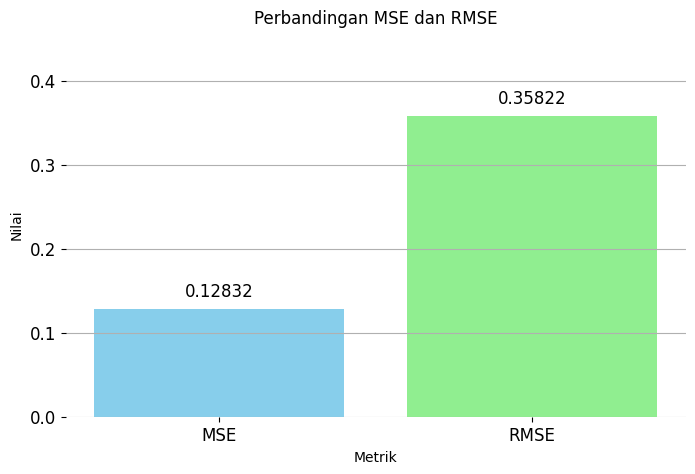

In [38]:
# Metrik dan nilai untuk visualisasi
metrics = ['MSE', 'RMSE']
values = [mse, rmse]

# Buat plot
plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, values, color=['skyblue', 'lightgreen'])

# Tambahkan label nilai pada batang
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 5), ha='center', va='bottom', fontsize=12)

plt.xlabel('Metrik')
plt.ylabel('Nilai')
plt.title('Perbandingan MSE dan RMSE')
plt.ylim(0, max(values) + 0.1)  # Sumbu y dari 0 hingga nilai maksimal + 0.1
plt.grid(axis='y')  # Garis grid pada sumbu y

# Menambahkan animasi pada plot
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### 3.2 Deep Learning

Menggunakan model jaringan saraf tiruan (Neural Network) untuk memprediksi rating.

#### 3.2.1 Data Preparation


- **Import Library:** Mengimpor pustaka `TensorFlow` dan `Keras` untuk deep learning, serta `KerasTuner` untuk hyperparameter tuning.


In [39]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, Callback
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from sklearn.model_selection import train_test_split
from kerastuner import HyperModel
from kerastuner.tuners import RandomSearch

- **Menggabungkan Dataset:** (Langkah ini tampaknya redundan karena sudah dilakukan sebelumnya, tapi diikuti sesuai notebook).


In [40]:
# Menyiapkan dataset
data_dl = pd.merge(ratings, movies, on='movieId')

- **Menampilkan Dataset:** Menampilkan data gabungan.


In [41]:
# Menampilkan dataset
data_dl

,userId,movieId,rating,timestamp,year,title,genres
0,1,1,4.0,2000-07-30 18:45:03,2000,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,1996-11-08 06:36:02,1996,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,2005-01-25 06:52:26,2005,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,2017-11-13 12:59:30,2017,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,2011-05-18 05:28:03,2011,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...,...
100831,610,160341,2.5,2016-11-19 08:55:49,2016,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,2016-11-19 08:43:18,2016,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,2017-05-03 20:53:14,2017,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,2017-05-03 21:59:49,2017,Blair Witch (2016),Horror|Thriller


- **Encoding User & Movie ID:**
    - Membuat pemetaan (mapping) dari `userId` dan `movieId` asli ke indeks integer unik (0 hingga N-1).


In [42]:
# Mengubah userId menjadi list tanpa nilai yang sama
user_ids = data_dl['userId'].unique().tolist()
print('list userID: ', user_ids)

# Melakukan encoding userId
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke userId
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list userID:  [1, 5, 7, 15, 17, 18, 19, 21, 27, 31, 32, 33, 40, 43, 44, 45, 46, 50, 54, 57, 63, 64, 66, 68, 71, 73, 76, 78, 82, 86, 89, 90, 91, 93, 96, 98, 103, 107, 112, 119, 121, 124, 130, 132, 134, 135, 137, 140, 141, 144, 145, 151, 153, 155, 156, 159, 160, 161, 166, 167, 169, 171, 177, 178, 179, 182, 185, 186, 191, 193, 200, 201, 202, 206, 213, 214, 216, 217, 219, 220, 223, 226, 229, 232, 233, 234, 239, 240, 247, 249, 252, 254, 263, 264, 266, 269, 270, 273, 274, 275, 276, 277, 279, 280, 282, 283, 288, 290, 291, 292, 293, 298, 304, 307, 314, 322, 323, 328, 330, 332, 334, 336, 337, 339, 341, 347, 350, 353, 357, 359, 364, 367, 372, 373, 378, 380, 381, 382, 385, 389, 391, 396, 399, 401, 411, 412, 414, 420, 422, 432, 434, 436, 438, 443, 448, 451, 453, 456, 460, 462, 468, 469, 470, 471, 474, 476, 477, 480, 483, 484, 488, 490, 492, 500, 504, 509, 514, 517, 522, 524, 525, 528, 529, 533, 534, 541, 544, 550, 555, 559, 560, 561, 562, 567, 570, 572, 573, 579, 580, 584, 587, 590, 596, 597, 599,

In [43]:
# Mengubah movieId menjadi list tanpa nilai yang sama
movie_ids = data_dl['movieId'].unique().tolist()

# Melakukan proses encoding movieId
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}

# Melakukan proses encoding angka ke movieId
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}

- **Mapping ke Data:** Menambahkan kolom `user` dan `movie` baru ke dataframe `data_dl` yang berisi ID hasil encoding.


In [44]:
# Mapping userID ke dataframe user
data_dl['user'] = data_dl['userId'].map(user_to_user_encoded)

# Mapping movieId ke dataframe movie
data_dl['movie'] = data_dl['movieId'].map(movie_to_movie_encoded)

- **Mencari Jumlah & Rentang:** Menghitung jumlah user unik, jumlah movie unik, serta rating minimum dan maksimum.


In [45]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)

# Mendapatkan jumlah movie
num_movie = len(movie_encoded_to_movie)

# Mengubah rating menjadi nilai float
data_dl['rating'] = data_dl['rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(data['rating'])

# Nilai maksimal rating
max_rating = max(data['rating'])

print('Number of User: {}, Number of Movie: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_movie, min_rating, max_rating
))

Number of User: 610, Number of Movie: 9724, Min Rating: 0.5, Max Rating: 5.0


- **One-Hot Encoding:** Melakukan *one-hot encoding* pada kolom `user` dan `movie` hasil encoding sebelumnya.


In [46]:
# Melakukan one-hot encoding user dan movie
user_encoded = pd.get_dummies(data_dl['user'], prefix='user')
movie_encoded = pd.get_dummies(data_dl['movie'], prefix='movie')

# Menggabungkan user dan movie
encoded_data = pd.concat([user_encoded, movie_encoded], axis=1)

- **Menentukan X dan y:**
    - `X`: Fitur input (matriks hasil one-hot encoding user dan movie).
    - `y`: Target output (rating yang dinormalisasi antara 0 dan 1).


In [47]:
# Membuat variabel input X
X = encoded_data.values
# Membuat variabel y untuk membuat rating dari hasil
y = data['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

- **Membagi Dataset:** Membagi data `X` dan `y` menjadi data latih (train) dan data uji (test).

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

#### 3.2.2 Model Development


- **Membangun Model (HyperModel):** Mendefinisikan kelas `RecommenderHyperModel` menggunakan `KerasTuner` untuk mencari arsitektur terbaik. Model dasarnya adalah jaringan saraf tiruan sekuensial dengan beberapa lapisan `Dense` (fully connected) dan `Dropout`. Lapisan output menggunakan aktivasi `sigmoid`.


In [49]:
# Definisikan model
class RecommenderHyperModel(HyperModel):
    def __init__(self, num_users, num_movies):
        self.num_users = num_users
        self.num_movies = num_movies

    def build(self, hp):
        model = keras.Sequential()
        model.add(layers.Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu', input_dim=self.num_users + self.num_movies))
        model.add(layers.Dropout(rate=hp.Float('dropout_2', min_value=0.1, max_value=0.5, step=0.1)))
        model.add(layers.Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu'))
        model.add(layers.Dropout(rate=hp.Float('dropout_2', min_value=0.1, max_value=0.5, step=0.1)))
        model.add(layers.Dense(1, activation='sigmoid'))

        model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-3, 1e-4])),
                      loss=MeanSquaredError(),
                      metrics=[RootMeanSquaredError()])

        return model

- **Membuat Fungsi Callback:** Mendefinisikan beberapa *callbacks* untuk proses training:
    - `ThresholdLossCallback`: Menghentikan training jika RMSE mencapai threshold tertentu.
    - `EarlyStopping`: Menghentikan training jika metrik (RMSE) tidak membaik.
    - `ModelCheckpoint`: Menyimpan model terbaik selama training.
    - `ReduceLROnPlateau`: Mengurangi learning rate jika tidak ada peningkatan.


In [50]:
# Membuat ThresholdLossCallback
class ThresholdLossCallback(Callback):
    def __init__(self, threshold):
        super(ThresholdLossCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        if logs.get('root_mean_squared_error') is not None and logs.get('root_mean_squared_error') < self.threshold:
            print(f"\nTraining stopped as root_mean_squared_error ({logs.get('root_mean_squared_error'):.4f}) has reached the threshold ({self.threshold})")
            self.model.stop_training = True

rmse_threshold_callback = ThresholdLossCallback(threshold=0.01)

In [51]:
# Fungsi callback yang digunakan
callbacks = [
    EarlyStopping(monitor='root_mean_squared_error', patience=10, verbose=1, restore_best_weights=True),
    ModelCheckpoint(filepath='best_model.h5', monitor='root_mean_squared_error', save_best_only=True, verbose=1),
    ReduceLROnPlateau(factor=0.5, patience=5, min_lr=0.000001, verbose=1), #
    rmse_threshold_callback
]

- **Hyperparameter Tuning (RandomSearch):**
    - Menggunakan `RandomSearch` dari `KerasTuner` untuk mencari hyperparameter terbaik (jumlah unit, dropout rate, learning rate) berdasarkan `val_loss`.


In [52]:
# Melakukan hyperparameter tuning
hypermodel = RecommenderHyperModel(num_users, num_movie)

tuner = RandomSearch(
    hypermodel,
    objective='val_loss',
    max_trials=50,
    executions_per_trial=1,
    directory='my_dir',
    project_name='recommender_system'
)

tuner.search_space_summary()

tuner.search(X_train, y_train,
             epochs=5,
             batch_size=128,
             validation_data=(X_test, y_test))

Trial 50 Complete [00h 00m 22s]
val_loss: 0.036106500774621964

Best val_loss So Far: 0.0354914553463459
Total elapsed time: 00h 24m 12s


- **Membuat Model Terbaik:** Mengambil arsitektur dan hyperparameter terbaik dari hasil tuning.


In [53]:
# Mengambil model terbaik dari hyperparameter tuning
best_model = tuner.get_best_models(num_models=1)[0]
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 160)               1653600   
                                                                 
 dropout (Dropout)           (None, 160)               0         
                                                                 
 dense_1 (Dense)             (None, 160)               25760     
                                                                 
 dropout_1 (Dropout)         (None, 160)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 161       
                                                                 
Total params: 1,679,521
Trainable params: 1,679,521
Non-trainable params: 0
_________________________________________________________________


- **Compile & Training Model:** Meng-compile model terbaik dengan optimizer Adam dan loss MSE, lalu melatihnya menggunakan data training (`X_train`, `y_train`) dengan validasi pada data test (`X_test`, `y_test`) dan callbacks yang telah ditentukan.


In [54]:
# Compile dan latih model terbaik
best_model.compile(optimizer=Adam(learning_rate=best_hps.get('learning_rate')),
                   loss=MeanSquaredError(),
                   metrics=[RootMeanSquaredError()])

history = best_model.fit(X_train, y_train,
                         epochs=100,
                         validation_data=(X_test, y_test),
                         callbacks=callbacks,
                         batch_size=128)

Epoch 1/100
704/709 [============================>.] - ETA: 0s - loss: 0.0293 - root_mean_squared_error: 0.1711
Epoch 1: root_mean_squared_error improved from inf to 0.17104, saving model to best_model.h5
709/709 [==============================] - 5s 7ms/step - loss: 0.0293 - root_mean_squared_error: 0.1710 - val_loss: 0.0360 - val_root_mean_squared_error: 0.1896 - lr: 0.0010
Epoch 2/100
704/709 [============================>.] - ETA: 0s - loss: 0.0251 - root_mean_squared_error: 0.1583
Epoch 2: root_mean_squared_error improved from 0.17104 to 0.15828, saving model to best_model.h5
709/709 [==============================] - 5s 7ms/step - loss: 0.0251 - root_mean_squared_error: 0.1583 - val_loss: 0.0372 - val_root_mean_squared_error: 0.1930 - lr: 0.0010
Epoch 3/100
709/709 [==============================] - ETA: 0s - loss: 0.0210 - root_mean_squared_error: 0.1448
Epoch 3: root_mean_squared_error improved from 0.15828 to 0.14477, saving model to best_model.h5
709/709 [====================

- **Visualisasi RMSE:** Membuat plot grafik *Root Mean Squared Error* (RMSE) pada data training dan validasi selama proses training.


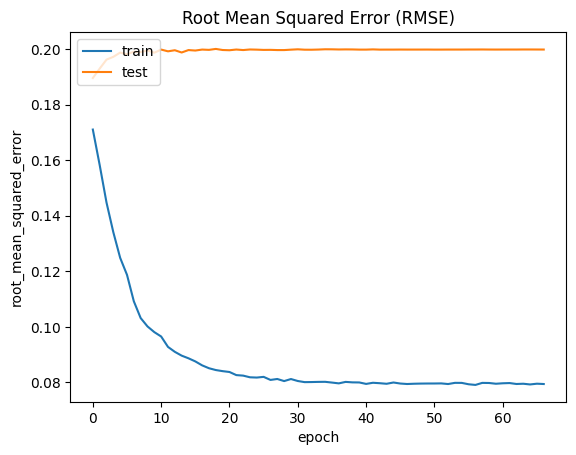

In [55]:
# Membuat plot grafik metrics
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Root Mean Squared Error (RMSE)')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

- **Visualisasi Loss (MSE):** Membuat plot grafik *Mean Squared Error* (MSE) pada data training dan validasi selama proses training.


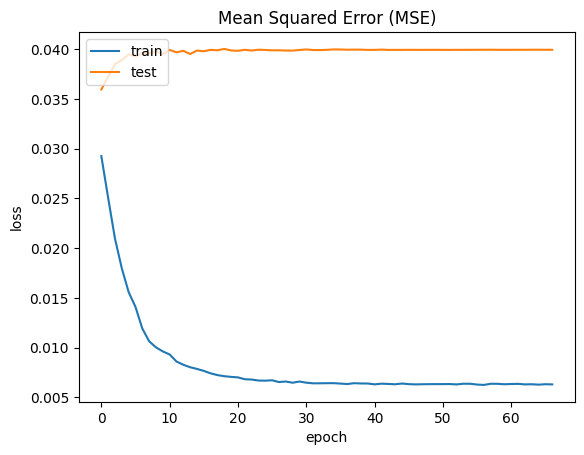

In [56]:
# Membuat plot grafik metrics
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Mean Squared Error (MSE)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

- **Mempersiapkan Data Movies:** Menambahkan kolom `new_movieId` (ID hasil encoding) ke dataframe `movies` untuk mempermudah pencarian judul berdasarkan ID hasil encoding.


In [57]:
# Membuat kolom ID baru dengan hasil encoding movieId
movies['new_movieId'] = movies['movieId'].map(movie_to_movie_encoded)

# Menangani nilai non-finite dengan menggantinya dengan nilai -1
movies['new_movieId'] = movies['new_movieId'].fillna(-1)

# Mengonversi kolom ke tipe data integer
movies['new_movieId'] = movies['new_movieId'].astype(int)

# Tampilkan data movies setelah penambahan kolom ID baru dan penghapusan nilai kosong
movies[['movieId', 'title', 'new_movieId']]

,movieId,title,new_movieId
0,1,Toy Story (1995),0
1,2,Jumanji (1995),481
2,3,Grumpier Old Men (1995),1
3,4,Waiting to Exhale (1995),482
4,5,Father of the Bride Part II (1995),483
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),5487
9738,193583,No Game No Life: Zero (2017),5488
9739,193585,Flint (2017),5489
9740,193587,Bungo Stray Dogs: Dead Apple (2018),5490


- **Membuat Fungsi Rekomendasi:** Mendefinisikan fungsi `recommend_movies_dl` yang:
    1. Mengidentifikasi film yang belum ditonton pengguna target.
    2. Membuat input one-hot encoded untuk pengguna target dan film-film yang belum ditonton.
    3. Menggunakan model deep learning (`best_model`) untuk memprediksi rating.
    4. Menggabungkan hasil prediksi dengan informasi film.
    5. Mengurutkan berdasarkan prediksi rating tertinggi dan mengembalikan N film teratas.


In [58]:
# Membuat fungsi untuk rekomendasi
def recommend_movies_dl(user_id,n):
    unwatched_movies = data_dl[data_dl['user'] != user_id]['movie'].unique() # Filter film-film yang belum ditonton oleh pengguna
    user_input = np.array([user_to_user_encoded[user_id]] * len(unwatched_movies)) # Buat input untuk model berdasarkan pengguna yang akan direkomendasikan dan film-film yang belum ditonton
    movie_input = np.array(unwatched_movies)
    user_encoded_input = tf.keras.utils.to_categorical(user_input, num_classes=num_users) # Buat one-hot encoded input untuk user
    movie_encoded_input = tf.keras.utils.to_categorical(movie_input, num_classes=num_movie) # Buat one-hot encoded input untuk movie
    X_recommend = np.concatenate((user_encoded_input, movie_encoded_input), axis=1) # Gabungkan kedua input
    predicted_ratings = best_model.predict(X_recommend).flatten() # Prediksi rating untuk film-film yang belum ditonton
    unwatched_movie_ids = [movie_encoded_to_movie[movie_id] for movie_id in movie_input] # Filter film-film yang sudah ditonton oleh pengguna
    unwatched_movies_df = movies[movies['new_movieId'].isin(unwatched_movie_ids)] # Buat DataFrame untuk film-film yang belum ditonton
    
    # Gabungkan data rating yang diprediksi dengan data film-film yang belum ditonton
    recommendations = pd.DataFrame({'movieId': unwatched_movie_ids, 'predicted_rating': predicted_ratings})
    recommendations = pd.merge(recommendations, unwatched_movies_df, on='movieId')
    # Urutkan film-film berdasarkan prediksi rating tertinggi
    top_n_recommendations = recommendations.sort_values(by='predicted_rating', ascending=False).head(n) 

    return top_n_recommendations.reset_index(drop=True)

- **Penggunaan Sistem Rekomendasi:** Memilih `userId` acak dan menampilkan 10 rekomendasi film teratas menggunakan fungsi `recommend_movies_dl`.

In [59]:
# Menentukan pengguna yang akan direkomendasikan
user_id = random.choice(user_ids)
# Melakukan rekomendasi
recommendations = recommend_movies_dl(user_id,10)
print(f"Top 10 Film Rekomendasi Untuk User {user_id}:")
recommendations[['movieId','title', 'genres']]	

304/304 [==============================] - 1s 1ms/step
Top 10 Film Rekomendasi Untuk User 37:


,movieId,title,genres
0,7121,Adam's Rib (1949),Comedy|Romance
1,78836,Enter the Void (2009),Drama
2,3224,Woman in the Dunes (Suna no onna) (1964),Drama
3,6818,Come and See (Idi i smotri) (1985),Drama|War
4,6442,Belle époque (1992),Comedy|Romance
5,53,Lamerica (1994),Adventure|Drama
6,3473,Jonah Who Will Be 25 in the Year 2000 (Jonas q...,Comedy
7,5833,Dog Soldiers (2002),Action|Horror
8,4956,"Stunt Man, The (1980)",Action|Adventure|Comedy|Drama|Romance|Thriller
9,9018,Control Room (2004),Documentary|War


---

**Kesimpulan:** Proyek ini mendemonstrasikan pembuatan sistem rekomendasi film dengan tiga teknik berbeda: Content-Based Filtering berbasis genre, Collaborative Filtering berbasis K-Means clustering, dan Collaborative Filtering berbasis Deep Learning (Neural Network). Setiap metode melibatkan persiapan data, pembangunan model, dan simulasi penggunaan yang spesifik.